In [2]:
import os
print(os.listdir())  
import sys
sys.path.append('src')


import os

os.chdir(r"C:\Users\hii\Desktop\XEMPLA_APPLY 24 July\Xempla _projects\project_root")


['.ipynb_checkpoints', 'data', 'models', 'notebook', 'Readme.md.txt', 'requirements.txt.txt', 'src', 'Untitled.ipynb']


In [19]:
print(df.columns.tolist())

df.columns = df.columns.str.strip()


['Datetime', 'RM_TEMP_I', 'RMCLGSPT_I', 'RMHTGSPT_I', 'RH_VLV_I', 'RH_VLV_DM_I', 'RH_GPM_I', 'RH_EWT_I', 'RH_LWT_I', 'VAV_DAT_I', 'VAV_DMPR_I', 'VAV_PM_CFM_SP_I', 'VAV_PM_CFM_I', 'VAV_DA_CFM_I', 'VAV_FAN_CS_I', 'VAV_FAN_DP_I', 'VAV_FAN_WAT_I', 'RM_TEMP_W', 'RMCLGSPT_W', 'RMHTGSPT_W', 'RH_VLV_W', 'RH_VLV_DM_W', 'RH_GPM_W', 'RH_EWT_W', 'RH_LWT_W', 'VAV_DAT_W', 'VAV_DMPR_W', 'VAV_PM_CFM_SP_W', 'VAV_PM_CFM_W', 'VAV_DA_CFM_W', 'VAV_FAN_CS_W', 'VAV_FAN_DP_W', 'VAV_FAN_WAT_W', 'RM_TEMP_S', 'RMCLGSPT_S', 'RMHTGSPT_S', 'RH_VLV_S', 'RH_VLV_DM_S', 'RH_GPM_S', 'RH_EWT_S', 'RH_LWT_S', 'VAV_DAT_S', 'VAV_DMPR_S', 'VAV_PM_CFM_SP_S', 'VAV_PM_CFM_S', 'VAV_DA_CFM_S', 'VAV_FAN_CS_S', 'VAV_FAN_DP_S', 'VAV_FAN_WAT_S', 'RM_TEMP_E', 'RMCLGSPT_E', 'RMHTGSPT_E', 'RH_VLV_E', 'RH_VLV_DM_E', 'RH_GPM_E', 'RH_EWT_E', 'RH_LWT_E', 'VAV_DAT_E', 'VAV_DMPR_E', 'VAV_PM_CFM_SP_E', 'VAV_PM_CFM_E', 'VAV_DA_CFM_E', 'VAV_FAN_CS_E', 'VAV_FAN_DP_E', 'VAV_FAN_WAT_E', 'SYS_CTL', 'OA_CFM', 'OA_DMPR', 'OA_DMPR_DM', 'OA_HUMD', 'OA_TE

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    104391
           1       1.00      1.00      1.00    210969

    accuracy                           1.00    315360
   macro avg       1.00      1.00      1.00    315360
weighted avg       1.00      1.00      1.00    315360



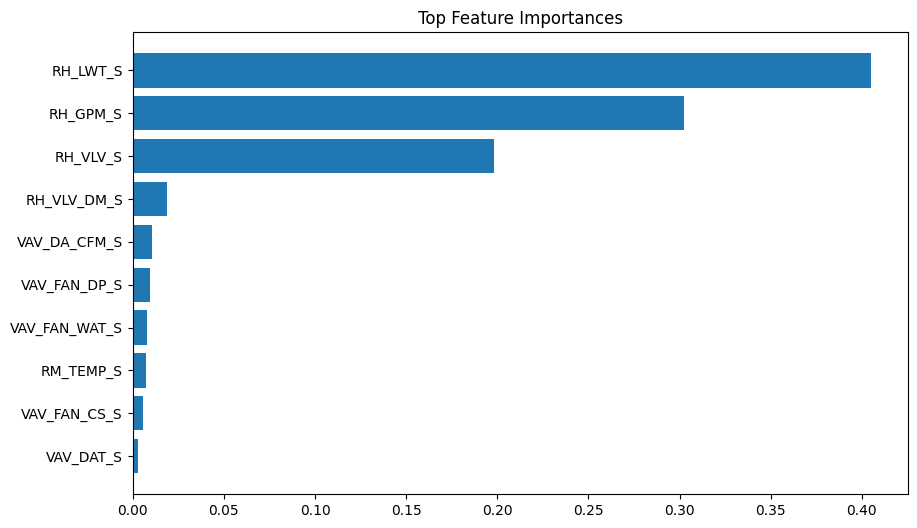

In [3]:
from data_loader import DataLoader
from feature_engineer import FeatureEngineer
from fault_detector import FaultDetector
from evaluator import Evaluator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading data
dataloader = DataLoader(r"C:\Users\hii\Desktop\XEMPLA_APPLY 24 July\Xempla _projects\project_root\data")
df = dataloader.load_labeled_data()

# Feature engineering
fe = FeatureEngineer(df)
X, y = fe.preprocess()

# Train/test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the  model
detector = FaultDetector()
detector.train(X_train, y_train)

# Predicting the output
y_pred = detector.predict(X_test)

# Evaluating the result
Evaluator.evaluate(y_test, y_pred)

# Visualizing the feature importances
detector.feature_importances(X.columns)


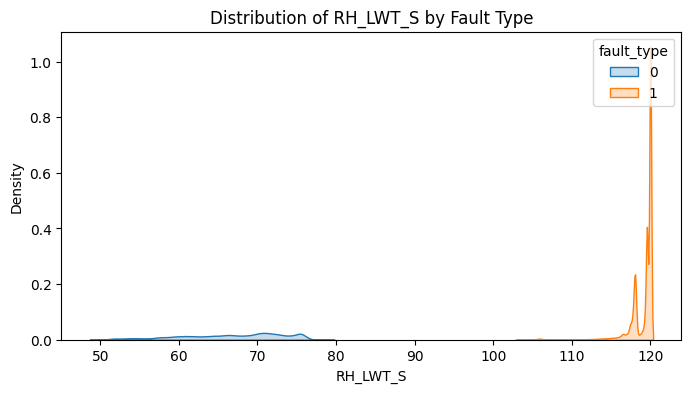

C:\Users\hii\AppData\Local\Temp\ipykernel_4396\858561275.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue='fault_type', fill=True)


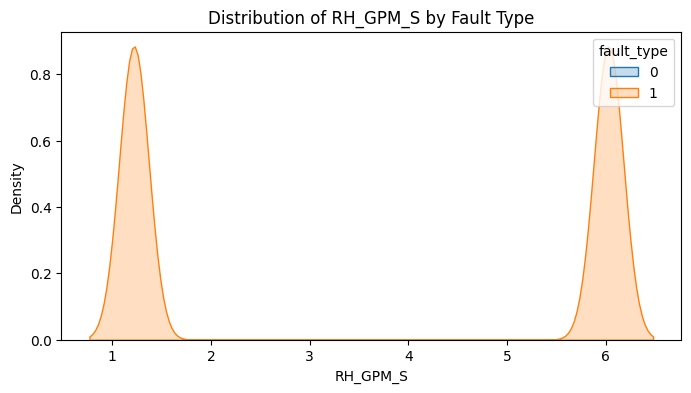

C:\Users\hii\AppData\Local\Temp\ipykernel_4396\858561275.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=feature, hue='fault_type', fill=True)


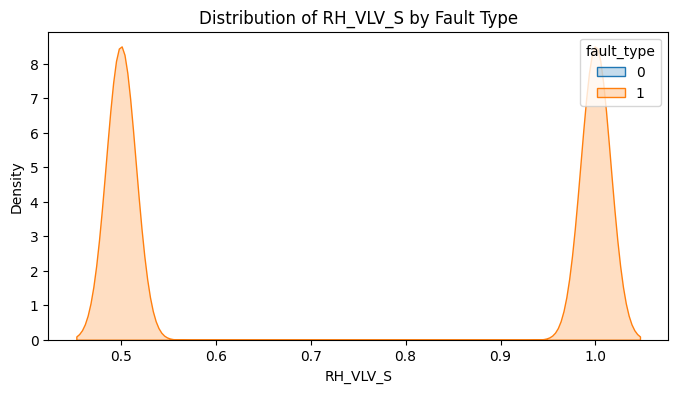

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()

# Setiing top features
top_features = ['RH_LWT_S', 'RH_GPM_S', 'RH_VLV_S']

# Plotting different  distributions
for feature in top_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=feature, hue='fault_type', fill=True)
    plt.title(f'Distribution of {feature} by Fault Type')
    plt.show()


True


In [65]:
'''import pandas as pd
import glob
import os

path = "../data"  # or wherever the PFPU CSV files are stored
all_files = glob.glob(os.path.join(path, "PFPU_*.csv"))

df_list = []
for file in all_files:
    temp_df = pd.read_csv(file)
    temp_df["source_file"] = os.path.basename(file)
    df_list.append(temp_df)

combined_df = pd.concat(df_list, ignore_index=True)
combined_df.to_csv("../data/combined_pfpu_data.csv", index=False)
print("✅ Combined CSV created.")'''
# this code was to combine the csv files one for the streamlit dashboard

ValueError: No objects to concatenate

In [66]:
import joblib
import os
#to check model folder exist 
os.makedirs("models", exist_ok=True)

# Save the inner RandomForestClassifier model
joblib.dump(detector.model, "models/random_forest_model.pkl")

print("✅ Model saved as 'models/random_forest_model.pkl'")


✅ Model saved as 'models/random_forest_model.pkl'
